## Bayesian Classification
### By Team 29 - Abhigyan Chattopadhyay (EE19B146), Nihal John George (EE19B131)

In [45]:
# Imports

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [46]:
# Path constants
data_path = './Data/'
team_num = '29'
pr_type = 'real'

total_path = data_path+team_num+'-'+pr_type+'/'

In [47]:
# Load data
train = pd.read_csv(total_path+'trian.txt', header=None, names=['x1', 'x2', 'y'])
dev = pd.read_csv(total_path+'dev.txt', header=None, names=['x1', 'x2', 'y'])

train.head()

,x1,x2,y
0,459.89,1656.7,1
1,500.00,1500.0,1
2,609.49,1269.8,1
3,687.55,1322.2,1
4,498.10,1742.6,1


In [48]:
X_train = train.iloc[:,:2].to_numpy()
y_train = train.iloc[:,2].to_numpy()

X_dev = dev.iloc[:,:2].to_numpy()
y_dev = dev.iloc[:,2].to_numpy()

In [49]:
# Bayes with Cov diff for all classes
# 
# For each class i, find the 2x2 cov matrix of x1 and x2
# cov_i = [[Ex1x1, Ex1x2], 
#        [Ex2x1, Ex2x2]]
# Find expectations from dataset by doing average of those 
# products over examples with y = i. This is MLE of cov given unimodal Gaussian assumption
# Now need to find mean meu vector for each class. 
# Find average of x1s and x2s for each class, this is MLE of mean
# given unimodal Gaussian assumption

# Now with mean and cov for each class, we can form classifier.
# Equations of discriminant functions for different cases given in Duda (2001) Ch 2, pg 19

# Case 1: Bayes with same cov for all classes - Find cov matrix without considering class
# Case 2: Bayes with diff cov - Discussed above
# Case 3: Naive Bayes with cov = sigma^2 I - Find variance of all feature values, across features.
# Case 4: Naive Bayes with cov same for all classes - cov matrix is diagonal (since naive), but diagonal values could be different. So find variance of x1, find variance of x2
# Case 5: Naive Bayes with cov diff for all classes - cov matrix is diagonal (since naive), but diagonal values could be diff, and the matrix is diff for each class

# Expected results
# Case 1: Hyperplane
# Case 2: Hyperquadratic
# Case 3: Hyperplane
# Case 4: Hyperplane
# Case 5: Hyperquadratic

In [50]:
# Finding mean and covariance of X in each class manually

cl_counts = [0,0,0]
x1_sums = [0,0,0]
x2_sums = [0,0,0]
x1sq_sums = [0,0,0]
x2sq_sums = [0,0,0]
x1x2_sums = [0,0,0]
m = X_train.shape[0]

for i in range(m):
    cl_ind = y_train[i]-1
    x1_here = X_train[i,0]
    x2_here = X_train[i,1]

    cl_counts[cl_ind] += 1
    x1_sums[cl_ind] += x1_here
    x2_sums[cl_ind] += x2_here
    x1sq_sums[cl_ind] += x1_here ** 2
    x2sq_sums[cl_ind] += x2_here ** 2
    x1x2_sums[cl_ind] += x1_here * x2_here
    
x1_means = [x1_sums[i]/cl_counts[i] for i in range(3)]
x2_means = [x2_sums[i]/cl_counts[i] for i in range(3)]
x1_mean_total = sum(x1_sums)/m
x2_mean_total = sum(x2_sums)/m

xall_mean = (sum(x1_sums)+sum(x2_sums))/(2*m)

x1_vars = [x1sq_sums[i]/cl_counts[i] - (x1_means[i]**2) for i in range(3)]
x2_vars = [x2sq_sums[i]/cl_counts[i] - (x2_means[i]**2) for i in range(3)]
x1x2_covars = [x1x2_sums[i]/cl_counts[i] - x1_means[i]*x2_means[i] for i in range(3)]

xall_var = (sum(x1sq_sums)+sum(x2sq_sums))/(2*m) - (xall_mean**2)
x1_var_total = sum(x1sq_sums)/m - (x1_mean_total**2) 
x2_var_total = sum(x2sq_sums)/m - (x2_mean_total**2) 
x1x2_covar_total = sum(x1x2_sums)/m - (x1_mean_total*x2_mean_total)

In [51]:
# Set mean vec and cov matrices for the 5 cases

x_means_vecs = [np.array([x1_means[i], x2_means[i]]) for i in range(3)]

cov_1 = np.array([[x1_var_total, x1x2_covar_total], [x1x2_covar_total, x2_var_total]])
cov_1_lst = [cov_1, cov_1, cov_1]

cov_2_lst = [np.array([[x1_vars[i], x1x2_covars[i]], [x1x2_covars[i], x2_vars[i]]]) for i in range(3)]

cov_3 = np.array([[xall_var, 0], [0, xall_var]])
cov_3_lst = [cov_3, cov_3, cov_3]

cov_4 = np.array([[x1_var_total, 0], [0, x2_var_total]])
cov_4_lst = [cov_4, cov_4, cov_4]

cov_5_lst = [np.array([[x1_vars[i], 0], [0, x2_vars[i]]]) for i in range(3)]

cov_all_lst = [cov_1_lst, cov_2_lst, cov_3_lst, cov_4_lst, cov_5_lst]
print("x1_means:", x1_means)
print("x2_means:", x2_means)
print("x1_mean_total:", x1_mean_total)
print("x2_mean_total:", x2_mean_total)
print("xall_mean:", xall_mean)
print("cov_1:\n", cov_1)
print("cov_2_lst:\n", cov_2_lst)
print("cov_3:\n", cov_3)
print("cov_4:\n", cov_4)
print("cov_5_lst:\n", cov_5_lst)

x1_means: [577.1283714285713, 413.0344857142854, 380.43094285714267]
x2_means: [1433.1066857142857, 1211.3526285714279, 1923.1610571428578]
x1_mean_total: 456.8645999999998
x2_mean_total: 1522.5401238095237
xall_mean: 989.7023619047618
cov_1:
 [[ 27660.1040536    -717.75249866]
 [  -717.75249866 180851.43317989]]
cov_2_lst:
 [array([[23784.98304849,  3974.92955146],
       [ 3974.92955146, 59177.67678388]]), array([[ 19629.20164188,  32642.39430707],
       [ 32642.39430707, 159476.04251138]]), array([[ 17339.56988968, -11033.43921528],
       [-11033.43921528,  58567.45097745]])]
cov_3:
 [[388171.84912842      0.        ]
 [     0.         388171.84912842]]
cov_4:
 [[ 27660.1040536       0.        ]
 [     0.         180851.43317989]]
cov_5_lst:
 [array([[23784.98304849,     0.        ],
       [    0.        , 59177.67678388]]), array([[ 19629.20164188,      0.        ],
       [     0.        , 159476.04251138]]), array([[17339.56988968,     0.        ],
       [    0.        , 5856

In [52]:
# Define PDF class

class PDF:
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov = cov
        self.cov_det = cov[0,0]*cov[1,1] - cov[1,0]*cov[0,1]
        self.cov_det_sqrt_inv = 1/(self.cov_det ** 0.5)
        self.cov_inv = np.array([[cov[1,1], -cov[0,1]], [-cov[1,0], cov[0,0]]])/self.cov_det
        self.two_pi_inv = 1/(2*np.pi)
        
    def p(self, x):
        return self.two_pi_inv * self.cov_det_sqrt_inv * np.exp(-0.5*(x-self.mean).T @ self.cov_inv @ (x-self.mean))
        

In [53]:
# Create PDF instances
pdf_1_lst = [PDF(x_means_vecs[i], cov_1) for i in range(3)]

pdf_2_lst = [PDF(x_means_vecs[i], cov_2_lst[i]) for i in range(3)]

pdf_3_lst = [PDF(x_means_vecs[i], cov_3) for i in range(3)]

pdf_4_lst = [PDF(x_means_vecs[i], cov_4) for i in range(3)]

pdf_5_lst = [PDF(x_means_vecs[i], cov_5_lst[i]) for i in range(3)]

pdf_all_lst = [pdf_1_lst, pdf_2_lst, pdf_3_lst, pdf_4_lst, pdf_5_lst]

In [113]:
# Covariance matrix eigenvectors

eig_1_lst = [np.linalg.eigh(cov_1)[1] for i in range(3)]

eig_2_lst = [np.linalg.eigh(cov_2_lst[i])[1] for i in range(3)]

eig_3_lst = [np.linalg.eigh(cov_3)[1] for i in range(3)]

eig_4_lst = [np.linalg.eigh(cov_4)[1] for i in range(3)]

eig_5_lst = [np.linalg.eigh(cov_5_lst[i])[1] for i in range(3)]

eig_all_lst = [eig_1_lst, eig_2_lst, eig_3_lst, eig_4_lst, eig_5_lst]


In [55]:
# Apply Bayes rule, get classifier. Takes an input vector, returns predicted class
priors = [1/3, 1/3, 1/3]
def predict(x, pdf_lst):
    
    likes = [pdf_lst[i].p(x) for i in range(3)]
    numer = [likes[i]*priors[i] for i in range(3)]
    evid = sum(numer)
    posts = np.array([numer[i]/evid for i in range(3)])

    class_pred = np.argmax(posts) + 1
    confidence = np.max(posts)

    return class_pred, confidence, posts

In [56]:
# Sanity check predict function
predict(np.array([0,13]), pdf_5_lst)

(2,
 0.9999996239922511,
 array([3.76002171e-07, 9.99999624e-01, 5.57766760e-12]))

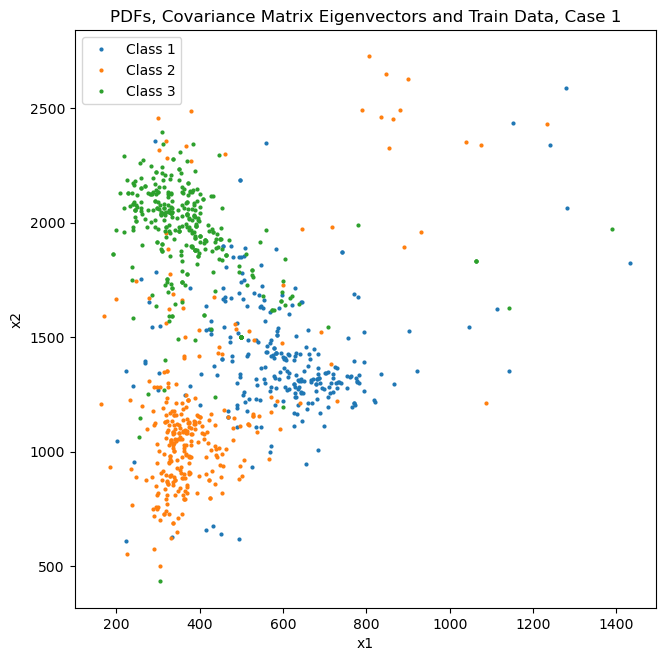

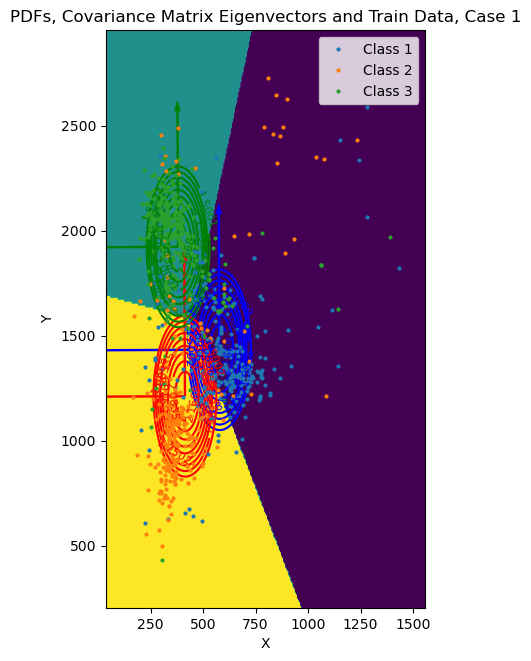

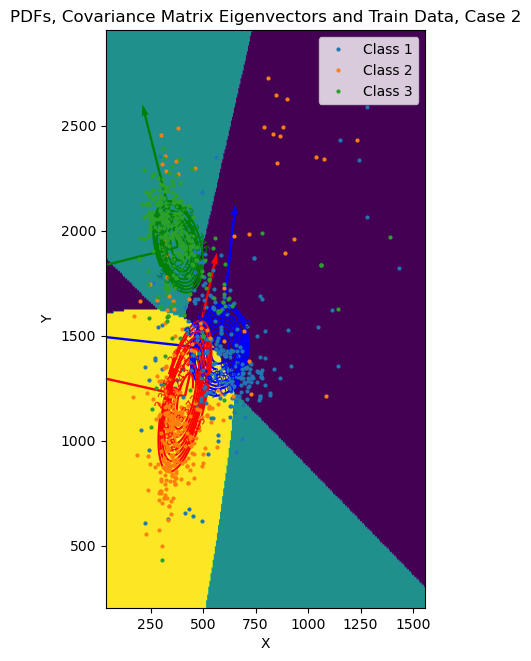

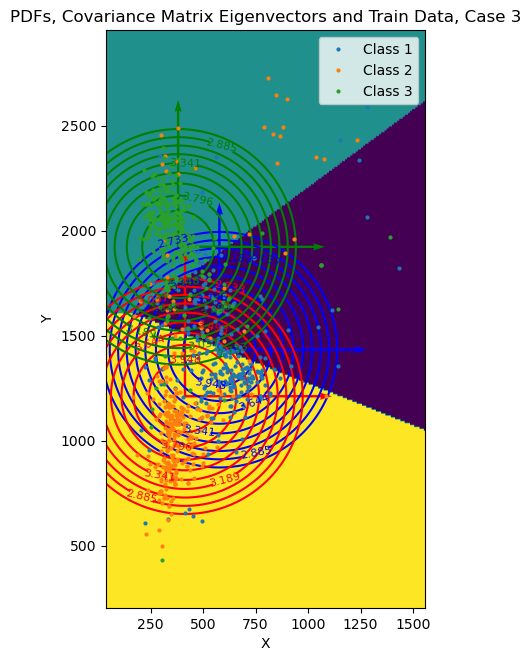

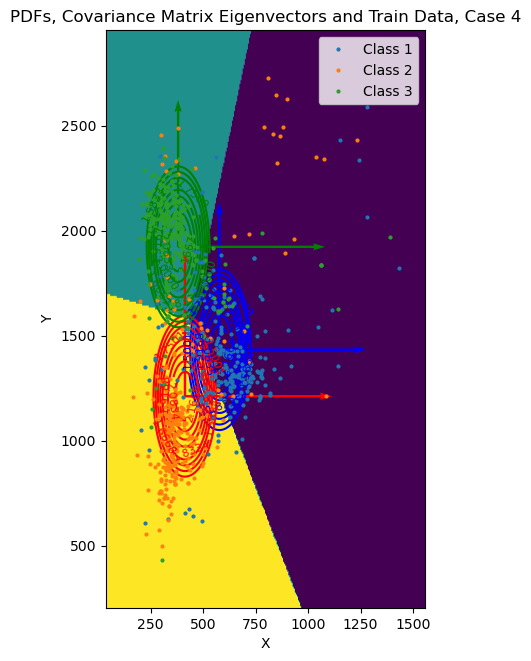

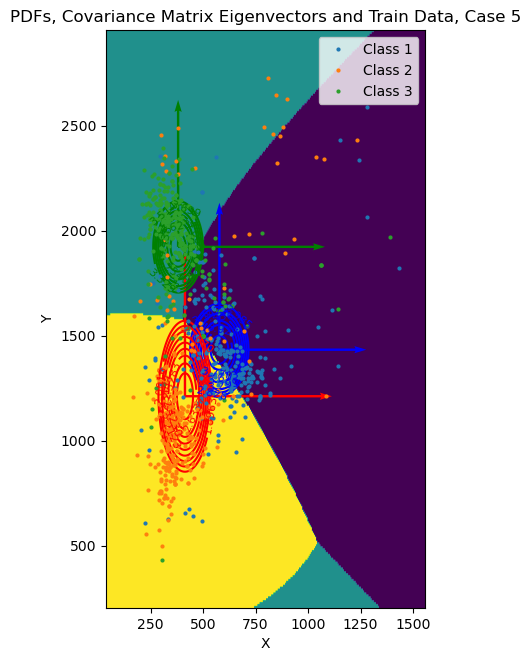

In [131]:
# Plot PDFs of each class for 5 cases, constant density curves and eigenvectors (plots #1,#3 in QP)
#TODO
prefs = [0, cl_counts[0], cl_counts[0]+cl_counts[1], cl_counts[0]+cl_counts[1]+cl_counts[2]]
X_train_classwise = [X_train[prefs[i]:prefs[i+1], :] for i in range(3)]

delta_x1 = (max(X_train[:,0] - min(X_train[:,0])))/10
delta_x2 = (max(X_train[:,1] - min(X_train[:,1])))/10

x1_min = min(X_train[:, 0]) - delta_x1
x2_min = min(X_train[:, 1]) - delta_x2

x1_max = max(X_train[:, 0]) + delta_x1
x2_max = max(X_train[:, 1]) + delta_x2

resol = 300
x1_pts = np.linspace(x1_min, x1_max, resol)
x2_pts = np.linspace(x2_min, x2_max, resol)
x1_mesh, x2_mesh = np.meshgrid(x1_pts, x2_pts)


for case in range(5):
    fig = plt.figure(figsize=(7.5,7.5))
    for i in range(3):
        plt.plot(X_train_classwise[i][:,0], X_train_classwise[i][:,1], 'o', ms=2)

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(["Class 1", "Class 2", "Class 3"])
    plt.title('PDFs, Covariance Matrix Eigenvectors and Train Data, Case ' + str(case+1))

    # ax = fig.add_subplot(111, projection='3d')
    ax = fig.gca()
    ax.set_xlim(x1_min, x1_max)
    ax.set_ylim(x2_min, x2_max)
    class_pts = np.array([predict(np.array([i,j]), pdf_all_lst[case])[0] for i,j in zip(np.ravel(x1_mesh), np.ravel(x2_mesh))])
    class_mesh = class_pts.reshape(x1_mesh.shape)
    ax.imshow(class_mesh, extent=[x1_min, x1_max, x2_min, x2_max])

    class_colors = ['blue', 'red', 'green']
    for class_here in range(3):
        z_pts = np.array([pdf_all_lst[case][class_here].p(np.array([i,j])) for i,j in zip(np.ravel(x1_mesh), np.ravel(x2_mesh))])
        z_mesh = z_pts.reshape(x1_mesh.shape)
        # print(z_mesh)
        # cfset = ax.contourf(x1_mesh, x2_mesh, z_mesh, cmap='coolwarm')
        # ax.imshow(np.rot90(z_mesh), extent=[x1_min, x1_max, x2_min, x2_max])

        
        cset = ax.contour(x1_mesh, x2_mesh, z_mesh, colors=class_colors[class_here], levels = np.linspace(np.max(z_mesh)/1.5,np.max(z_mesh), 10))
        ax.clabel(cset, fontsize=8, colors=class_colors[class_here])

        mul = 700
        ax.quiver([x_means_vecs[class_here][0]]*2, [x_means_vecs[class_here][1]]*2 , (mul*eig_all_lst[case][class_here][0,:]).tolist(), (mul*eig_all_lst[case][class_here][1,:]).tolist(), color=[class_colors[class_here]], angles='xy', scale_units='xy', scale=1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_aspect('equal')
        # ax.plot_surface(x1_mesh, x2_mesh, z_mesh)
        # ax.set_xlabel('x1')
        # ax.set_ylabel('x2')
        # ax.set_zlabel('f([x1,x2])')

    plt.show()

In [57]:
# Decision Boundaries for 5 cases
#TODO

# gi(x) = x'*Wi*x + wi'*x + wi0
# Wi = -0.5 * inv(cov_i)
# wi = inv(cov_i) * ui
# wi0 = -0.5 * ui'*inv(cov_i)*ui - 0.5*ln(det(cov_i)) + ln(P(class i))

# W_lst = [[-0.5*np.inv(cov_all_lst[case][label]) for label in range(3)] for case in range(5)]
# w_lst = [[np.inv(cov_all_lst[case][label] @ pdf_all_lst[case][label] for label in range(3)] for case in range(5)]
# w0_lst = [[-0.5 * pdf_all_lst[case][label].T @ np.inv(cov_all_lst[case][label]) @ pdf_all_lst[case][label] - 0.5*np.log(np.linalg.det(cov_all_lst[case][label])) + np.log(priors[label]) for label in range(3)] for case in range(5)]


In [58]:
# Plot Decision Boundaries for 5 cases (plot #2 in QP)
#TODO

# Make constantly spaced values of x1. 
# x1 = np.linspace(-1,15,1000)

# Solve for x2 using variables, gi(x) = 0 
# x2_lst = [[W_lst[case][label]]]

# Make list of x2, but dont plot full line, plot only those points which are not in the region of third class


# Color non-line points with class colour to show class region

In [59]:
# Predict on Train and Dev Set

cases = [pdf_1_lst, pdf_2_lst, pdf_3_lst, pdf_4_lst, pdf_5_lst]
m_dev = X_dev.shape[0]
conf_mat_lst = []
conf_mat_train_lst = []
posts_ll = []
for pdf_lst_here in cases:
    posts_list = []
    conf_mat = np.zeros([3,3])
    
    for i in range(m_dev):
        class_pred, conf, posts = predict(X_dev[i], pdf_lst_here)
        class_true = y_dev[i]
        posts_list.extend([[posts[i], i+1, class_true] for i in range(3)])
        conf_mat[class_true-1, class_pred-1] += 1

    posts_ll.append(posts_list)
    conf_mat_lst.append(conf_mat.copy())

    conf_mat_train = np.zeros([3,3])
    for i in range(m):
        
        class_pred, conf, posts = predict(X_train[i], pdf_lst_here)
        class_true = y_train[i]
        conf_mat_train[class_true-1, class_pred-1] += 1
    conf_mat_train_lst.append(conf_mat_train.copy())

print("Train Confusion ---")
for i in range(5):
    print(conf_mat_train_lst[i])

print("\nDev Confusion ---")
for i in range(5):
    print(conf_mat_lst[i])

Train Confusion ---
[[282.  41.  27.]
 [ 75. 251.  24.]
 [ 51.  10. 289.]]
[[285.  31.  34.]
 [ 75. 254.  21.]
 [ 46.   9. 295.]]
[[267.  51.  32.]
 [ 64. 251.  35.]
 [ 51.   8. 291.]]
[[282.  41.  27.]
 [ 75. 251.  24.]
 [ 51.  10. 289.]]
[[289.  32.  29.]
 [ 75. 246.  29.]
 [ 46.   9. 295.]]

Dev Confusion ---
[[81. 14.  5.]
 [16. 80.  4.]
 [17.  2. 81.]]
[[82. 10.  8.]
 [14. 82.  4.]
 [16.  2. 82.]]
[[73. 17. 10.]
 [15. 78.  7.]
 [18.  1. 81.]]
[[81. 14.  5.]
 [16. 80.  4.]
 [17.  2. 81.]]
[[84.  9.  7.]
 [15. 80.  5.]
 [16.  2. 82.]]


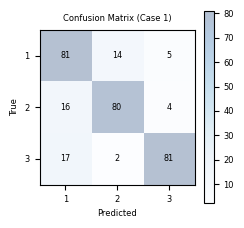

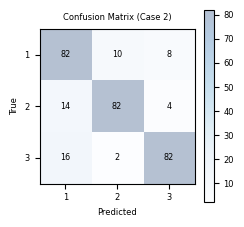

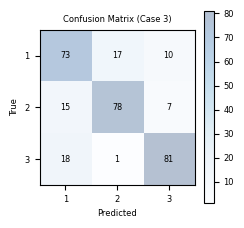

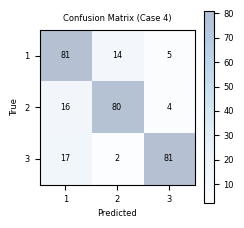

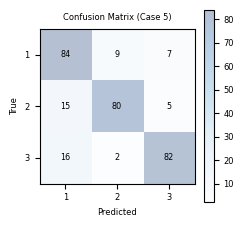

In [60]:
# Dev set confusion matrix for 5 cases (plot #4 in QP)
#TODO

for case in range(5):
    conf_mat = conf_mat_lst[case]
    conf_mat_here = 
    fig = plt.figure(figsize=(2.5,2.5))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3, 
                    interpolation='nearest')

    width, height = conf_mat.shape

    for x in range(width):
        for y in range(height):
            ax.annotate(str(int(conf_mat[x][y])), xy=(y, x), ha='center', va='center', size='xx-small')

    cb = fig.colorbar(res)
    cb.ax.tick_params(labelsize=6)
    plt.xticks(range(width), range(1,width+1), fontsize=6)
    plt.yticks(range(height), range(1,width+1), fontsize=6)
    plt.xlabel('Predicted', fontsize=6)
    plt.ylabel('True', fontsize=6)
    plt.title("Confusion Matrix (Case " + str(case+1) + ")", fontsize=6)
    plt.show()
    # plt.savefig('confusion_matrix.png', format='png')

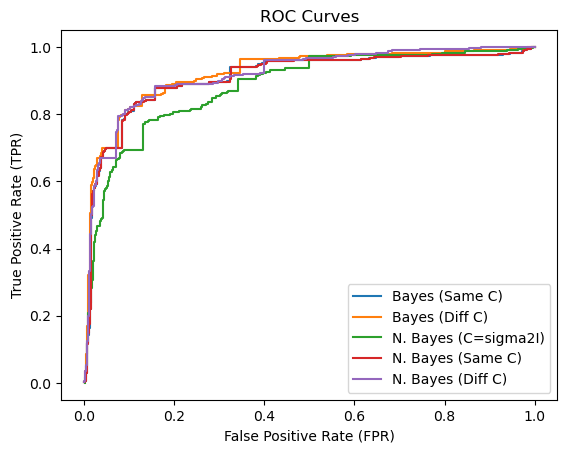

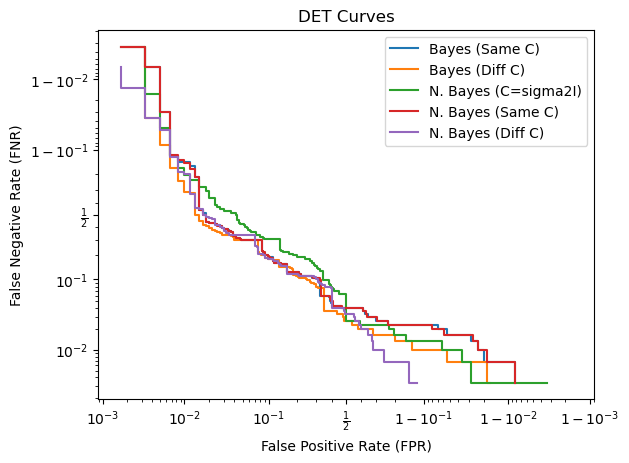

In [61]:
# ROC, DET curves for 5 cases in 1 plot (plot #5 in QP)
#TODO

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
# Sort in ascending order
for case in range(5):
    posts_list = posts_ll[case]
    posts_list = sorted(posts_list)
    roc_pts = [[0,0]]
    fp_total = []
    tp_fn_cts = [0]  #  tp_fn_cts[i] = no. of examples left of (and excluding) i which can be only tp or fn
    tn_fp_cts = [0]

    for i in range(len(posts_list)):
        post_here = posts_list[i]
        if post_here[1] == post_here[2]:
            tp_fn_cts.append(tp_fn_cts[-1] + 1)
            tn_fp_cts.append(tn_fp_cts[-1])
        else:
            tp_fn_cts.append(tp_fn_cts[-1])
            tn_fp_cts.append(tn_fp_cts[-1] + 1)

    # print(tp_fn_cts)
    # print(tn_fp_cts)
    tp_fn_tot = tp_fn_cts[-1]
    tn_fp_tot = tn_fp_cts[-1]
    tpr = []
    fpr = []
    tnr = []
    fnr = []
    ex_ct = len(posts_list)
    for i in range(len(posts_list)):

        thresh = posts_list[i][0]
        tpr.append((tp_fn_tot - tp_fn_cts[i])/tp_fn_tot)
        fpr.append((tn_fp_tot - tn_fp_cts[i])/tn_fp_tot)
        tnr.append(tn_fp_cts[i]/tn_fp_tot)
        fnr.append(tp_fn_cts[i]/tp_fn_tot)

    # roc_pts = [[fpr[i],tpr[i]] for i in range(len(tpr))]
    
    ax1.plot(fpr, tpr)
    ax2.plot(fpr, fnr)
ax1.legend(['Bayes (Same C)', 'Bayes (Diff C)', 'N. Bayes (C=sigma2I)', 'N. Bayes (Same C)', 'N. Bayes (Diff C)'])
ax2.legend(['Bayes (Same C)', 'Bayes (Diff C)', 'N. Bayes (C=sigma2I)', 'N. Bayes (Same C)', 'N. Bayes (Diff C)'])
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')

ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('False Negative Rate (FNR)')

ax2.set_xscale('logit')
ax2.set_yscale('logit')

# scale = 2
# ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*scale))
# ax2.xaxis.set_major_formatter(ticks)
# ax2.yaxis.set_major_formatter(ticks)

ax1.set_title("ROC Curves")
ax2.set_title("DET Curves")
plt.show()
    # DET = FPR(x) vs FNR(y)